In [5]:
import matplotlib.pyplot as plt
import os
import numpy as np
import skimage
import cv2
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#True Sign - Original Save - x_data1

filenames1 = os.listdir("SignImage1") #True Sign's filename
x_data1=np.empty((0,784), int) # where iimage will be saved

for filename1 in filenames1:
    full_filename1 = os.path.join("SignImage1",filename1)

    if not full_filename1.endswith('.jpg'):continue

    img_origin = mpimg.imread(full_filename1) #load image

    img_origin = color.rgb2gray(img_origin) #make in black and white

    img_shape_origin = img_origin.shape

    img=(np.full(img_shape_origin, 1)-img_origin)*255 #invert colors and make values between 0 and 255

    img=resize(img,(28,28)) #make it 28*28 size

    img=img.astype(int) #convert data that was converted to real form into integers during processing

    img_data=img.flatten() #mnist type data

    x_data1=np.vstack((x_data1, img_data)) #add to x_data1
    
np.save('x_data1', x_data1)

print(x_data1.shape[0])

500


In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import skimage
import cv2
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#True Sign - Translaion Save - x_data11

filenames1 = os.listdir("SignImage1") #True Sign's filename
x_data11=np.empty((0,784), int)

path = '/home/student13/computational-physics/TransSave1'
k=0

for filename1 in filenames1:
    full_filename1 = os.path.join("SignImage1",filename1)

    if not full_filename1.endswith('.jpg'):continue

    img_origin = mpimg.imread(full_filename1)

    img_origin = color.rgb2gray(img_origin)

    rows, cols = img_origin.shape[:2]
    location=[-5,5] # (-5,-5), (-5,5), (5,-5), (5,5)
    
    for i in location:
        for j in location:
            M=np.float32([[1,0,i],[0,1,j]])
    
            img_trans = cv2.warpAffine(img_origin, M, (cols, rows),borderValue=1-5/255)
        
            number=str(k)
        
            cv2.imwrite(os.path.join(path , number+'.jpg'),img_trans)
            
            k+=1
            
            img_shape_trans = img_trans.shape

            img_trans=(np.full(img_shape_trans, 1)-img_trans)*255 

            img_trans=resize(img_trans,(28,28))

            img_trans=img_trans.astype(int)

            img_data_trans=img_trans.flatten()

            x_data11=np.vstack((x_data11, img_data_trans))
   
np.save('x_data11', x_data11)

print(x_data11.shape[0])

2000


In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np
import skimage
import cv2
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#True Sign - Rotation Save - x_data111

filenames1 = os.listdir("SignImage1") #True Sign's filename
x_data111=np.empty((0,784), int)

for filename1 in filenames1:
    full_filename1 = os.path.join("SignImage1",filename1)

    if not full_filename1.endswith('.jpg'):continue

    img_origin = mpimg.imread(full_filename1)

    img_origin = color.rgb2gray(img_origin)
    
    deg=[-10,-8,-6,-4,-2,2,4,6,8,10]
    for i in deg: 
        img_rot = skimage.transform.rotate(img_origin,i,mode='constant',cval=1-5/255)

        img_shape_rot = img_rot.shape

        img_rot=(np.full(img_shape_rot, 1)-img_rot)*255

        img_rot=resize(img_rot,(28,28))

        img_rot=img_rot.astype(int)

        img_data_rot=img_rot.flatten()

        x_data111=np.vstack((x_data111, img_data_rot))
        
np.save('x_data111', x_data111)

print(x_data111.shape[0])

5000


In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import skimage
import cv2
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#True Sign - Translation + Rotation Save - x_data1111

filenames1 = os.listdir("SignImage1") #True Sign's filename
x_data1111=np.empty((0,784), int)

for filename1 in filenames1:
    full_filename1 = os.path.join("SignImage1",filename1)

    if not full_filename1.endswith('.jpg'):continue

    img_origin = mpimg.imread(full_filename1) 

    img_origin = color.rgb2gray(img_origin)

    rows, cols = img_origin.shape[:2]
    location=[-5,5]
    for i in location:
        for j in location:
            M=np.float32([[1,0,i],[0,1,j]])
    
            img_trans_temp = cv2.warpAffine(img_origin, M, (cols, rows),borderValue=1-5/255)
        
            deg=[-10,-8,-6,-4,-2,2,4,6,8,10]
            for i in deg: 
                img_transrot = skimage.transform.rotate(img_trans_temp,i,mode='constant',cval=1-5/255)

                img_shape_transrot = img_transrot.shape

                img_transrot=(np.full(img_shape_transrot, 1)-img_transrot)*255 

                img_transrot=resize(img_transrot,(28,28))

                img_transrot=img_transrot.astype(int)

                img_data_transrot=img_transrot.flatten()

                x_data1111=np.vstack((x_data1111, img_data_transrot))
    
np.save('x_data1111', x_data1111)
print(x_data1111.shape[0])
    

20000


In [2]:
x_data11111=np.empty((0,784), int)

x_data1=np.load('x_data1.npy')
x_data11=np.load('x_data11.npy')
x_data111=np.load('x_data111.npy')
x_data1111=np.load('x_data1111.npy')

x_data11111=np.vstack((x_data11111, x_data1))        
x_data11111=np.vstack((x_data11111, x_data11))
x_data11111=np.vstack((x_data11111, x_data111))
x_data11111=np.vstack((x_data11111, x_data1111))

count1=x_data1.shape[0]+x_data11.shape[0]+x_data111.shape[0]+x_data1111.shape[0]

t_data=np.full((count1,),1)

print(count1)
print(x_data11111.shape)
print(t_data.shape)

27500
(27500, 784)
(27500,)


In [7]:
import matplotlib.pyplot as plt
import os
import numpy as np
import skimage
import cv2
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

x_data0=np.empty((0,784), int)

#Fake Sign - Original Save - x_data2

filenames0 = os.listdir("SignImage0") #Fake Sign's filename

for filename0 in filenames0:
    full_filename0 = os.path.join("SignImage0",filename0)

    if not full_filename0.endswith('.jpg'):continue
    
    img_fake = mpimg.imread(full_filename0)

    img_fake = color.rgb2gray(img_fake)
    
    img_shape_fake = img_fake.shape

    img=(np.full(img_shape_fake, 1)-img_fake)*255

    img=resize(img,(28,28))

    img=img.astype(int)

    img_data=img.flatten()
    
    x_data0=np.vstack((x_data0, img_data))

np.save('x_data0', x_data0)

print(x_data0.shape[0])

500


In [8]:
import matplotlib.pyplot as plt
import os
import numpy as np
import skimage
import cv2
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

x_data00=np.empty((0,784), int)

path = '/home/student13/computational-physics/TransSave0'
k=0

#Fake Sign - Translation Save - x_data00

filenames0 = os.listdir("SignImage0") #Fake Sign's filename

for filename0 in filenames0:
    full_filename0 = os.path.join("SignImage0",filename0)

    if not full_filename0.endswith('.jpg'):continue
    
    img_fake = mpimg.imread(full_filename0)

    img_fake = color.rgb2gray(img_fake)
    
    rows, cols = img_fake.shape[:2]
    location=[-5,5]
    for i in location:
        for j in location:
            M=np.float32([[1,0,i],[0,1,j]])
    
            img_trans_temp = cv2.warpAffine(img_fake, M, (cols, rows),borderValue=1-5/255)
        
            number=str(k)
        
            cv2.imwrite(os.path.join(path , number+'.jpg'),img_trans_temp)
            
            k+=1
        
            img_shape_trans = img_trans_temp.shape

            img_trans=(np.full(img_shape_trans, 1)-img_trans_temp)*255

            img_trans=resize(img_trans,(28,28))

            img_trans=img_trans.astype(int)

            img_data_trans=img_trans.flatten()

            x_data00=np.vstack((x_data00, img_data_trans))
            
np.save('x_data00', x_data00)

print(x_data00.shape[0])

2000


In [9]:
import matplotlib.pyplot as plt
import os
import numpy as np
import skimage
import cv2
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

x_data000=np.empty((0,784), int)

#Fake Sign - Rotation Save - x_data000

filenames0 = os.listdir("SignImage0") #Fake Sign's filename

for filename0 in filenames0:
    full_filename0 = os.path.join("SignImage0",filename0)

    if not full_filename0.endswith('.jpg'):continue
    
    img_fake = mpimg.imread(full_filename0)

    img_fake = color.rgb2gray(img_fake) 
    
    deg=[-10,-8,-6,-4,-2,2,4,6,8,10]
    for i in deg:
        img_rot = skimage.transform.rotate(img_fake,i,mode='constant',cval=1-5/255)

        img_shape_rot = img_rot.shape

        img_rot=(np.full(img_shape_rot, 1)-img_rot)*255

        img_rot=resize(img_rot,(28,28))

        img_rot=img_rot.astype(int) 

        img_data_rot=img_rot.flatten() 

        x_data000=np.vstack((x_data000, img_data_rot))
                  
np.save('x_data000', x_data000)

print(x_data000.shape[0])

5000


In [5]:
x_data0000=np.empty((0,784), int)

filenames0 = os.listdir("SignImage0")

#남싸인추가
for filename0 in filenames0:
    full_filename0 = os.path.join("SignImage0",filename0)

    if not full_filename0.endswith('.jpg'):continue
    
    img_fake = mpimg.imread(full_filename0)

    img_fake = color.rgb2gray(img_fake) #흑백으로 만들기
    
    rows, cols = img_fake.shape[:2]
    location=[-5,5]
    for i in location:
        for j in location:
            M=np.float32([[1,0,i],[0,1,j]])
    
            img_trans_temp = cv2.warpAffine(img_fake, M, (cols, rows),borderValue=1-5/255)
    
            #평행이동 + 회전변환
            deg=[-10,-8,-6,-4,-2,2,4,6,8,10]
            for i in deg: 
                img_transrot = skimage.transform.rotate(img_trans_temp,i,mode='constant',cval=1-5/255) #아까 불러온 img로 img_rot 생성, 작은 포문도는동안 2도,4도,6도,8도,10도로 돌리면서 추가

                img_shape_transrot = img_transrot.shape

                img_transrot=(np.full(img_shape_transrot, 1)-img_transrot)*255 #색반전 및 0-255사이의 값으로 만들기

                img_transrot=resize(img_transrot,(28,28)) #28*28사이즈로 만들기

                img_transrot=img_transrot.astype(int) #처리과정에서 실수형식으로 바뀐 데이터 정수형식으로 변환

                img_data_transrot=img_transrot.flatten() #mnist형 데이터

                x_data0000=np.vstack((x_data0000, img_data_transrot)) #x_data에 추가
    
np.save('x_data0000', x_data0000)

print(x_data0000.shape[0])
        

20000


In [6]:
import numpy as np
x_data0=np.load('x_data0.npy')
x_data00=np.load('x_data00.npy')
x_data000=np.load('x_data000.npy')
x_data0000=np.load('x_data0000.npy')

x_data00000=np.empty((0,784), int)

x_data00000=np.vstack((x_data00000, x_data0))        
x_data00000=np.vstack((x_data00000, x_data00))
x_data00000=np.vstack((x_data00000, x_data000))
x_data00000=np.vstack((x_data00000, x_data0000))

count0=x_data0.shape[0]+x_data00.shape[0]+x_data000.shape[0]+x_data0000.shape[0]

t_data=np.hstack((t_data,np.full((count0,),0)))

print(count0)
print(x_data00000.shape)
print(t_data.shape)

x_data=np.vstack((x_data11111, x_data00000))

print(x_data.shape)

27500
(27500, 784)
(55000,)
(55000, 784)


In [9]:
# Shuffle the data randomly

data_num=x_data.shape[0]
data_size=x_data.shape[1]

t_data=t_data.reshape(data_num,1) #reshape to concate
xt=np.hstack((x_data, t_data)) #concate x and t to keep them paired
#print(xt)

xts=np.random.permutation(xt) #shuffle data
#print(xts)

xs, ts = np.hsplit(xts, np.array([data_size, ])) #split x and t
ts = ts.reshape(data_num) #back to original shape
#print(xs)
#print(ts)

divide=38500
x_train=xs[:divide]
x_test=xs[divide:]
t_train=ts[:divide]
t_test=ts[divide:]

print(x_train)
print(t_train)
print(x_test)
print(t_test)

#save these 4 numpy objects individually    
    
np.save('x_data', x_data)
np.save('t_data', t_data)
np.save('x_train', x_train)
np.save('t_train', t_train)
np.save('x_test', x_test)
np.save('t_test', t_test)

[[5 5 5 ... 5 5 1]
 [5 5 5 ... 5 5 1]
 [5 5 5 ... 5 5 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 1]
 [0 5 5 ... 5 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 5 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [5 5 5 ... 5 5 1]]
[[0 0 0 ... 0 0 0]
 [0 5 5 ... 5 5 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 5 ... 5 0 0]
 [0 0 0 ... 0 0 0]
 [5 5 5 ... 5 5 5]]
[1 1 0 ... 1 0 1]
[[0 0 0 ... 0 0 0]
 [0 5 5 ... 5 5 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 5 ... 5 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 1 0 ... 1 0 0]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 5 ... 5 0 0]
 [0 0 0 ... 0 0 0]
 [5 5 5 ... 5 5 5]]
[0 1 1 ... 1 0 1]


In [16]:
#I have quoted the code for the class materials.

from common.functions import *
from common.gradient import numerical_gradient
import pickle

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # initialize the weights and bias
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : input variables, t : true value
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : input variable, t : true value
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
      
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
    
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

In [17]:
#load sign data

x_data=np.load('x_data.npy') 
t_data=np.load('t_data.npy')
x_train=np.load('x_train.npy')
t_train=np.load('t_train.npy')
x_test=np.load('x_test.npy')
t_test=np.load('t_test.npy')


In [13]:
#change into one-hot-label : To speed up processing

temp=np.empty((0,2),int)
for i in range(t_train.shape[0]):
    if t_train[i]==0:
        temp=np.vstack((temp,np.array([1,0])))
    if t_train[i]==1:
        temp=np.vstack((temp,np.array([0,1])))
t_train=temp

temp=np.empty((0,2),int)
for i in range(t_test.shape[0]):
    if t_test[i]==0:
        temp=np.vstack((temp,np.array([1,0])))
    if t_test[i]==1:
        temp=np.vstack((temp,np.array([0,1])))
t_test=temp


In [14]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=2)

train acc, test acc | 0.5143116883116883, 0.5147272727272727
train acc, test acc | 0.8923636363636364, 0.8924242424242425
train acc, test acc | 0.9040259740259741, 0.9035151515151515
train acc, test acc | 0.9128571428571428, 0.9150909090909091
train acc, test acc | 0.9076623376623376, 0.9072727272727272
train acc, test acc | 0.9244415584415584, 0.9232727272727272
train acc, test acc | 0.9265194805194805, 0.9243030303030303
train acc, test acc | 0.9245194805194805, 0.9188484848484848
train acc, test acc | 0.933038961038961, 0.9271515151515152
train acc, test acc | 0.932987012987013, 0.931030303030303
train acc, test acc | 0.9367792207792208, 0.9364848484848485
train acc, test acc | 0.9288831168831169, 0.9276363636363636
train acc, test acc | 0.927948051948052, 0.925030303030303
train acc, test acc | 0.9402857142857143, 0.9381212121212121
train acc, test acc | 0.9454805194805195, 0.9435151515151515
train acc, test acc | 0.9425194805194805, 0.9423636363636364
train acc, test acc | 0.94059

train acc, test acc | 0.9746233766233766, 0.9690909090909091
train acc, test acc | 0.9725454545454545, 0.9687878787878788
train acc, test acc | 0.9742597402597403, 0.9692121212121212
train acc, test acc | 0.9755584415584415, 0.9702424242424242
train acc, test acc | 0.9768051948051948, 0.9723030303030303
train acc, test acc | 0.9746753246753247, 0.9695757575757575
train acc, test acc | 0.9755064935064935, 0.9688484848484848
train acc, test acc | 0.9742337662337662, 0.969939393939394
train acc, test acc | 0.9751688311688311, 0.969939393939394
train acc, test acc | 0.976935064935065, 0.9724242424242424
train acc, test acc | 0.9753766233766233, 0.9705454545454546
train acc, test acc | 0.9761818181818182, 0.97
train acc, test acc | 0.9772987012987013, 0.971939393939394
train acc, test acc | 0.9777662337662337, 0.9723030303030303
train acc, test acc | 0.9763116883116884, 0.9713939393939394
train acc, test acc | 0.9762857142857143, 0.9713939393939394
train acc, test acc | 0.9752467532467533, 

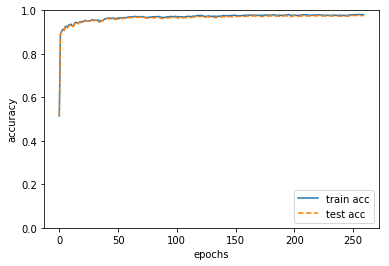

In [15]:
# hyperparameters

iters_num = 100000  # set the number of iterations
train_size = x_train.shape[0]
batch_size = 100  #  mini batch size
learning_rate = 1

import matplotlib.pyplot as plt
import os
import numpy as np
import skimage
import cv2
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_loss_list = []
train_acc_list = []
test_acc_list = []

# how many iterations per epoch 

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # obtain mini batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)

    # update parameters : weight and bias
    for key in ('W1', 'b1', 'W2', 'b2'): # we need to update the parameters in network
        network.params[key] -= learning_rate * grad[key]
    
    # save progress
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # accuracy ca1uation per epoch
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

#save the model for later use
network.save_params("SuhyunProject.pkl") 

# draw a graph for accuracy 
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [5]:
############################
###########################
# 교수님! 싸인 테스트 해보실 때 "TestSign" 폴더에 있는 사진 지우시고 교수님 싸인(.jpg) 넣으신 다음에 테스트 해보시면 돼요!!
# 한번에 여러장 돌리는 것까지는 못해서 일일이 하나씩 넣고 지우고 넣고 지우고 해봤었습니다.

import matplotlib.pyplot as plt
import os
import numpy as np
import skimage
import cv2
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys, os
import pickle
import time
from common.functions import sigmoid, softmax

start_time=time.time()

#Add Test Sign

filenames = os.listdir("TestSign") #TestSign's filename

for filename in filenames:
    full_filename = os.path.join("TestSign",filename)

    if not full_filename.endswith('.jpg'):continue

    img_origin = mpimg.imread(full_filename) 

    img_origin = color.rgb2gray(img_origin) 

    img_shape_origin = img_origin.shape

    img=(np.full(img_shape_origin, 1)-img_origin)*255

    img=resize(img,(28,28))

    img=img.astype(int) 

    img_data=img.flatten() 
    
    x=img_data

def init_network():
    with open("SuhyunProject.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

network = init_network()

y = predict(network, x)
p= np.argmax(y) # get the index which gives the highest

print(p)

#Check that p and t are equal

0


In [2]:
# 이건 다른 사진해봤던 거 입니다. 더 해봤었는데 길어지기만 해서 지웠습니다.

import matplotlib.pyplot as plt
import os
import numpy as np
import skimage
import cv2
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys, os
import pickle
import time
from common.functions import sigmoid, softmax

start_time=time.time()

#Add Test Sign

filenames = os.listdir("TestSign9") #TestSign's filename

for filename in filenames:
    full_filename = os.path.join("TestSign9",filename)

    if not full_filename.endswith('.jpg'):continue

    img_origin = mpimg.imread(full_filename) 

    img_origin = color.rgb2gray(img_origin) 

    img_shape_origin = img_origin.shape

    img=(np.full(img_shape_origin, 1)-img_origin)*255

    img=resize(img,(28,28))

    img=img.astype(int) 

    img_data=img.flatten() 
    
    x=img_data

def init_network():
    with open("SuhyunProject.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

network = init_network()

y = predict(network, x)
p= np.argmax(y) # get the index which gives the highest

print(p)

#Check that p and t are equal

0
